In [65]:
import pyreadr
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [9]:
covMats = np.load("cmats.npy")

In [11]:
# covMats.shape = (18540000,)
covM = np.reshape(covMats,(100,100,1854))

In [106]:
# dates df
df1 = pd.read_csv("SP500_percent_data1.csv")
dates = df1["date"]

In [66]:
# dimensions
n = 100

# lists
var55 = []
var95 = []
condNum = []

for i in range(covM.shape[2]):
    # sigma[i]
    mat = covM[:,:,i]
    
    # condition number
    c = LA.cond(mat)
    condNum.append(c)
    
    # perform svd decomp
    model = PCA(n_components=n)
    model.fit_transform(mat)
    
    # explained variance vector - cumulative
    v = model.explained_variance_ratio_.cumsum()
    idx55 = np.where(v>=.55)
    idx95 = np.where(v>=.95)
    
    # extract number of eigenvalues needed, 0 indexed 
    x = idx55[0][0] + 1
    y = idx95[0][0] + 1
    
    # append to list
    var55.append(x)
    var95.append(y)
    

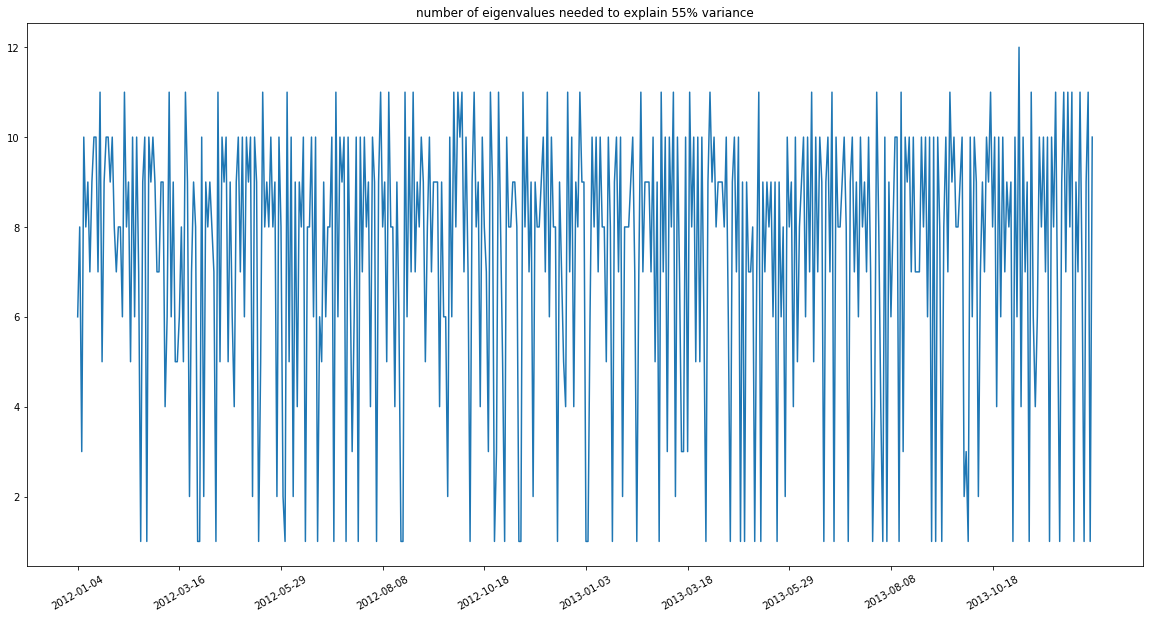

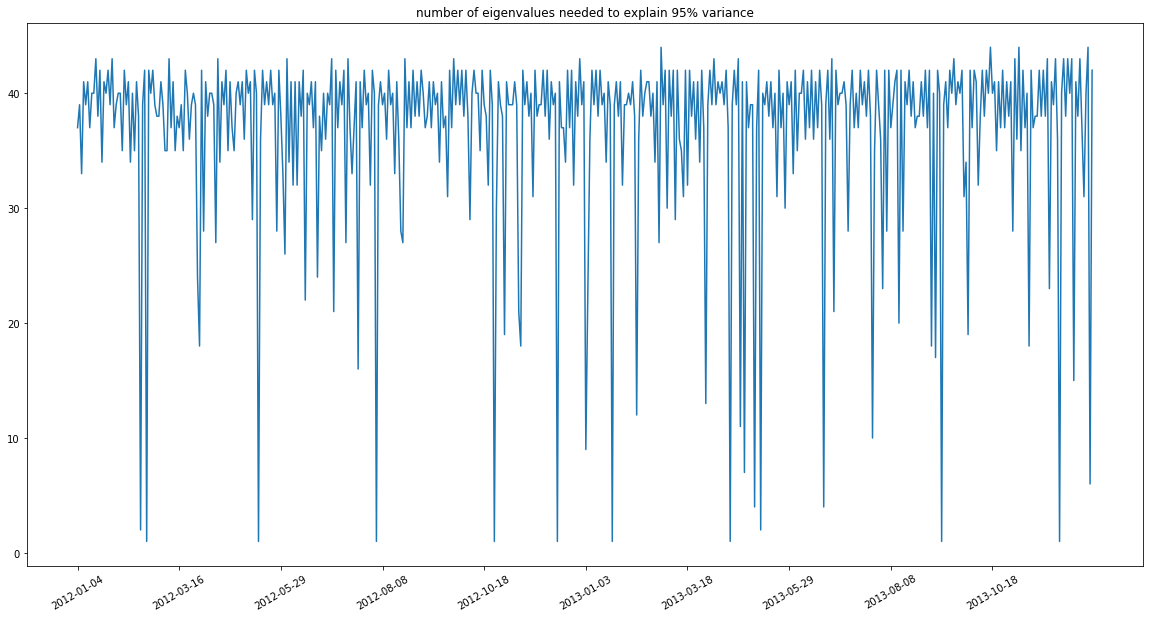

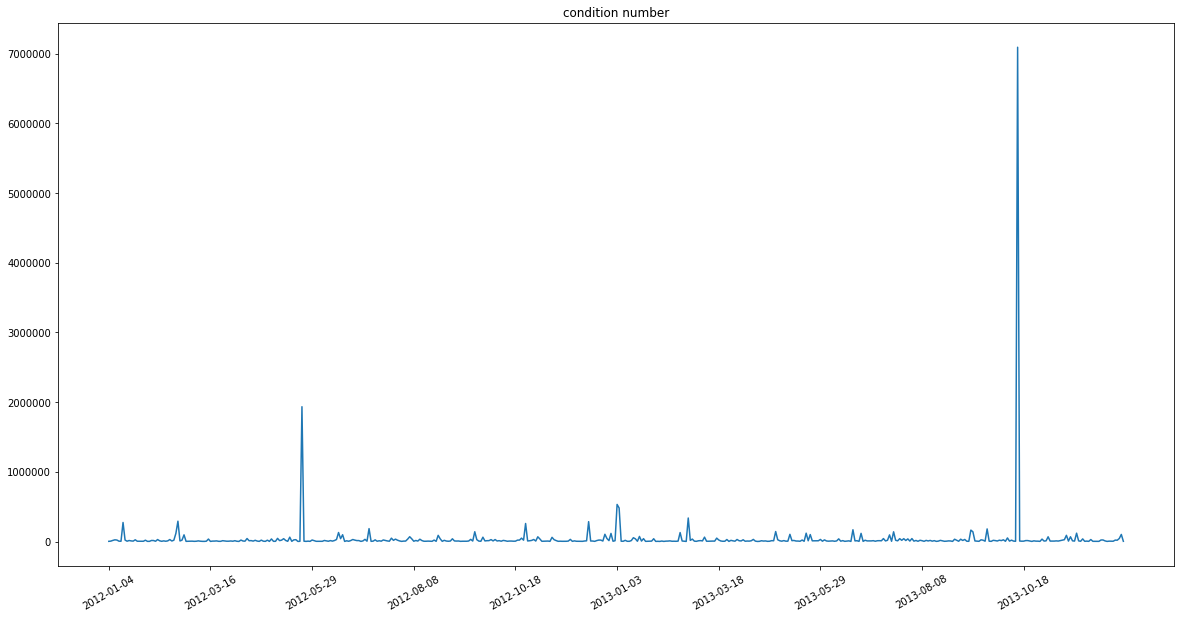

In [111]:
arr = np.zeros((covM.shape[2],3))
arr[:,0] = var55
arr[:,1] = var95
arr[:,2] = condNum

df = pd.DataFrame(arr)
df.index = dates
col_string = 'number of eigenvalues needed to explain '
df.columns = [col_string + '55% variance',col_string + '95% variance','condition number']

# num dates to plot to ease visualization
length = 500

for i in range(df.shape[1]):
        plt.figure(i,figsize=(20,10))
        plt.plot(dates[:length],df.iloc[:length,i])
        plt.xticks(df.iloc[:length,i].index[::50], rotation=30)
        plt.title(df.columns[i])
        plt.show()